In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [0]:
x_train = np.memmap('drive/My Drive/Xtrain.dat', shape=(600000, 2351), dtype=np.float32)
y_train = np.memmap('drive/My Drive/Ytrain.dat', dtype=np.float32)
# 0 for benign (nb of elm => 300000)
# 1 for malicious (nb of elm => 300000)

In [4]:
print(x_train)
print(x_train.shape)

[[  3.7433937   1.3417011   1.5087795 ...   0.          0.
    0.       ]
 [ 18.43898     4.467576    4.2452645 ...   0.          0.
    0.       ]
 [ 47.065903    9.949453    2.189625  ...   0.          0.
    0.       ]
 ...
 [134.32236     2.8423796   2.7915328 ...   0.          0.
    0.       ]
 [129.39911     3.1475294   1.9884748 ...   0.          0.
    0.       ]
 [174.9149      1.3446283   1.5648073 ...   0.          0.
    0.       ]]
(600000, 2351)


In [5]:
# dimension reduction
print(x_train.shape)
x_train = np.delete(x_train, np.s_[-47:], axis=1)
print(x_train.shape)

(600000, 2351)
(600000, 2304)


In [0]:
# normalize data for printing (pixels range: [0, 255])
min_max_scaler = preprocessing.MinMaxScaler((0, 255), copy=False)
x_train = min_max_scaler.fit_transform(x_train)

In [7]:
print(x_train)

[[  3.7148898   1.3417011   1.5087795 ...  27.967741  151.48515
  194.90779  ]
 [ 18.410475    4.467576    4.2452645 ...  27.967741  151.48515
  194.90779  ]
 [ 47.037395    9.949453    2.189625  ...  27.967741  151.48515
  194.90779  ]
 ...
 [134.29384     2.8423796   2.7915328 ...  27.967741  151.48515
  194.90779  ]
 [129.37059     3.1475294   1.9884748 ...  27.967741  151.48515
  194.90779  ]
 [174.88638     1.3446283   1.5648073 ...  27.967741  151.48515
  194.90779  ]]


In [0]:
# reshape the data to consider vectors as images
x_train = np.reshape(x_train, (600000, 48, 48))

In [0]:
# define the classes
classes = ['benign', 'malicious']

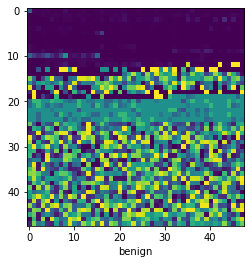

In [10]:
# plot one image
plt.figure()
plt.imshow(x_train[200])
plt.grid(False)
plt.xlabel(classes[int(y_train[200])])
plt.show()

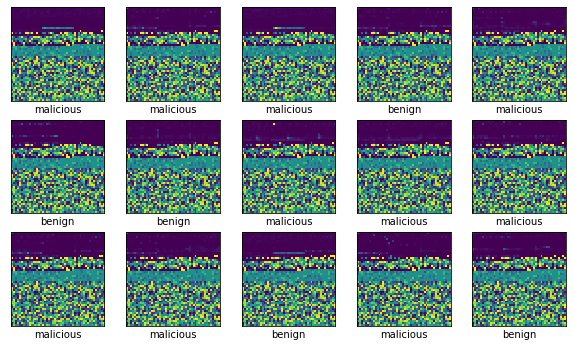

In [11]:
# graphical representation of the malwares
plt.figure(figsize=(10,10))
cpt = 1
for i in range(50000, 50015):
  plt.subplot(5, 5, cpt)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(classes[int(y_train[i])])
  cpt += 1
plt.show()

In [0]:
# reshape for CNN
x_train = np.reshape(x_train, (600000, 48, 48, 1))
# normalize pixels between [0, 1]
x_train = x_train / 255.0

In [13]:
# split the data into two parts (training set and test set)
x_train, x_test = x_train[:550000], x_train[550000:]
y_train, y_test = y_train[:550000], y_train[550000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(550000, 48, 48, 1)
(550000,)
(50000, 48, 48, 1)
(50000,)


In [0]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [0]:
# The CNN model
model = Sequential()

# stacking the conv model on our sequential neural network
# First Conv layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))

# Second Conv
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Third Conv layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# Input of the neural net
model.add(Flatten())

# Hidden layer
model.add(Dense(400, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)              

In [0]:
# compile our model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# fit our model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=4, shuffle=True)

440000/440000 [==============================] - 134s 305us/step - loss: 0.1584 - acc: 0.9357 - val_loss: 0.1005 - val_acc: 0.9641
Epoch 2/4
440000/440000 [==============================] - 120s 272us/step - loss: 0.0927 - acc: 0.9648 - val_loss: 0.0847 - val_acc: 0.9702
Epoch 3/4
440000/440000 [==============================] - 109s 248us/step - loss: 0.0749 - acc: 0.9726 - val_loss: 0.0775 - val_acc: 0.9752
Epoch 4/4
440000/440000 [==============================] - 112s 254us/step - loss: 0.0644 - acc: 0.9765 - val_loss: 0.0709 - val_acc: 0.9772


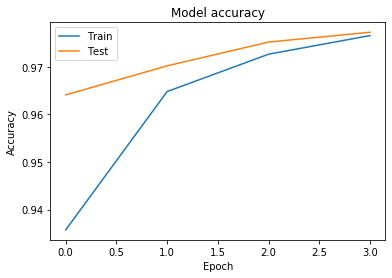

In [19]:
# evaluate our model

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# save the model
model.save('drive/My Drive/models_save/cnn.h5')

In [0]:
model_ = load_model('drive/My Drive/models_save/cnn.h5')

In [24]:
# evaluate our model
loss, acc = model_.evaluate(x_test, y_test, verbose=2)

print("loss: " + str(loss))
print("acc: " + str(acc))

loss: 0.059726288664639
acc: 0.98006
